In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [10]:
engine.execute('select * from measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [11]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns1 = inspector.get_columns('station')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

Text(0, 0.5, 'inches')

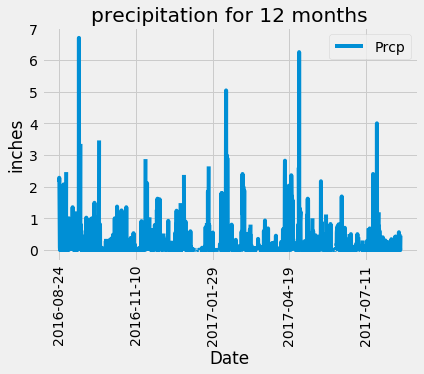

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

lastdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
#lastdate is 2017-08-23
date = dt.date(2017,8,23)

#calculate 1 year ago
pastyear = date - dt.timedelta(days = 365)
#1 year ago is 2016-08-23


results = session.query(measurement.date, measurement.prcp).filter(measurement.date > "2016-08-23").all()


# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

data = pd.DataFrame(result[0] for result in results)
df = data.rename(columns = {0 : "Date"})
df["Prcp"] = [(result[1]) for result in results]
df1 =df.set_index('Date').sort_index()
df1



# Use Pandas Plotting with Matplotlib to plot the data

fig = df1.plot(title = "precipitation for 12 months")
plt.xticks(rotation = 90)
plt.ylabel("inches")


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df[["Prcp"]].describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?

session.query(func.count(station.station)).all()

[(9)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.

session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(measurement.station, func.count(measurement.station), func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()

('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)

Text(0.5, 1.0, '12 mo.of temperature histogram')

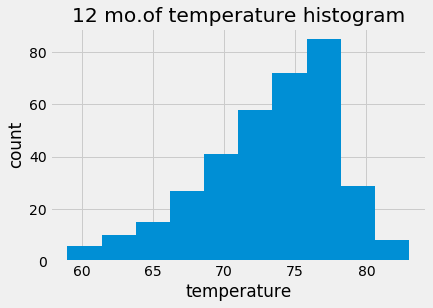

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df2 = pd.DataFrame(session.query(measurement.tobs).filter(measurement.station == 'USC00519281', measurement.date > "2016-08-23").all())
plt.hist(df2['tobs'])
plt.xlabel("temperature")
plt.ylabel("count")
plt.title("12 mo.of temperature histogram")



In [40]:
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).filter(measurement.date >= "2016-08-23").all()

[(58.0, 74.59058295964125, 87.0)]

## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016,8,23','2017,8,23'))

[(56.0, 74.14421827631008, 84.0)]


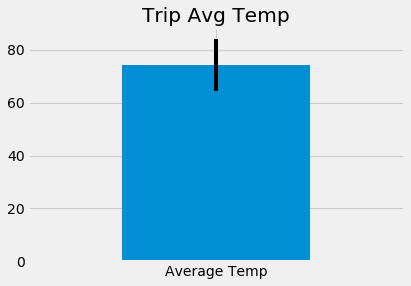

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg = pd.DataFrame([calc_temps('2016,8,23','2017,8,23')[0][1]])
variance = [calc_temps('2016,8,23','2017,8,23')[0][2] - calc_temps('2016,8,23','2017,8,23')[0][1]]
x_axis = np.arange(len(avg))
x = ['Average Temp']
fig, ax = plt.subplots(1, 1)
ax.bar(x_axis, avg[0], yerr=variance, width=0.2)
ax.set_xlim(-0.2, 0.2)
plt.xticks(x_axis, x)
plt.title("Trip Avg Temp")
plt.show()

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(station.name, station.latitude, station.longitude, station.elevation, func.sum(measurement.prcp)).filter(measurement.station == station.station, measurement.date > "2016-08-23").order_by(func.sum(measurement.prcp).desc()).group_by(measurement.station).all()

[('MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  147.11000000000004),
 ('WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  68.24000000000002),
 ('KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 48.36000000000003),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 37.99),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 33.19),
 ('WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 16.089999999999986),
 ('PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.59)]

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
trips = ["01-01","01-02","01-03","01-04","01-05","01-06","01-07"]
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
startdate = dt.datetime(2018,1,1)
enddate = dt.datetime(2018,1,7)


# Use the start and end date to create a range of dates

delta = (enddate - startdate).days

datelist = [startdate + dt.timedelta(days=x) for x in range(delta + 1)]
datelist



# Stip off the year and save a list of %m-%d strings

newlist = [f"{date.strftime('%m')}-{date.strftime('%d')}" for date in datelist]
newlist

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in newlist:
    normals.append(daily_normals(date))
normals

[[(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)],
 [(58.0, 70.0, 76.0)],
 [(56.0, 67.96428571428571, 76.0)],
 [(61.0, 68.96491228070175, 76.0)],
 [(57.0, 68.54385964912281, 76.0)]]

In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

tmin = []
tavg = []
tmax = []
for row in normals:
    tmin.append(row[0][0])
    tavg.append(row[0][1])
    tmax.append(row[0][2])

df3 = pd.DataFrame(tmin)
df4 = df3.rename(columns = {0: "tmin"})
df4["tavg"] = tavg
df4["tmax"] = tmax
df4["date"] = datelist
df4


,tmin,tavg,tmax,date
0,62.0,69.153846,77.0,2018-01-01
1,60.0,69.396226,77.0,2018-01-02
2,62.0,68.909091,77.0,2018-01-03
3,58.0,70.000000,76.0,2018-01-04
4,56.0,67.964286,76.0,2018-01-05
5,61.0,68.964912,76.0,2018-01-06
6,57.0,68.543860,76.0,2018-01-07


Text(0, 0.5, 'Temperature')

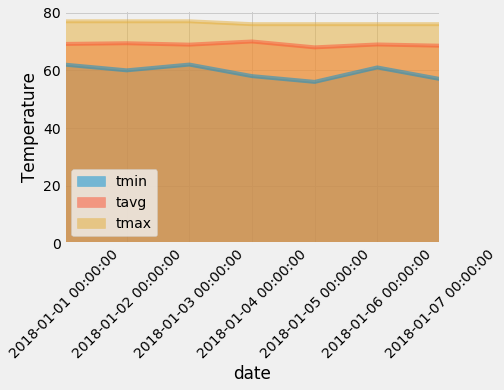

In [28]:
# Plot the daily normals as an area plot with `stacked=False`
df5 = df4.set_index("date")
df5

ax1 = df5.plot.area(stacked=False, rot = 45)
ax1.set_xticks(datelist)
ax1.set_xticklabels(df4["date"])
ax1.set_ylabel("Temperature")